## PROYECTO 1

Integrantes:

* Andres Felipe Delgado
* Jaime Torres
* Sebastian Gonzalez

In [66]:
pip install imblearn

     |████████████████████████████████| 189 kB 97 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [113]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.layers import LSTM
#from keras.layers.embeddings import Embedding
#from keras.preprocessing import sequence
#from keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sebastian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cargue de datos

In [12]:
# Se cargan los datos. 
df_entrada=pd.read_csv('Reviews.csv', sep=',', encoding = 'utf-8')

## Exploracion de los datos

In [13]:
# Revisamos conteos
df_entrada.shape

(568454, 10)

In [116]:
#Revisamos primeros datos
df_entrada.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0


In [117]:
#Revisamos tipo de datos
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264598 entries, 0 to 264597
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      264598 non-null  int64  
 1   ProductId               264598 non-null  object 
 2   UserId                  264598 non-null  object 
 3   ProfileName             264598 non-null  object 
 4   HelpfulnessNumerator    264598 non-null  float64
 5   HelpfulnessDenominator  264598 non-null  float64
 6   Score                   264598 non-null  int64  
 7   Time                    264598 non-null  int64  
 8   Summary                 264598 non-null  object 
 9   Text                    264598 non-null  object 
 10  helpfulness             264598 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 22.2+ MB


In [17]:
#Reemplazar valores con 0 por nan
df_entrada["HelpfulnessNumerator"].replace(0, np.nan, inplace = True)
df_entrada["HelpfulnessDenominator"].replace(0, np.nan, inplace = True)

In [15]:
#Revisamos valores
df_entrada['HelpfulnessNumerator'].value_counts()

0      303826
1      116467
2       53727
3       29007
4       16963
        ...  
193         1
188         1
179         1
174         1
491         1
Name: HelpfulnessNumerator, Length: 231, dtype: int64

In [16]:
#Revisamos valores
df_entrada['HelpfulnessDenominator'].value_counts()

0      270052
1      112753
2       61482
3       34394
4       22306
        ...  
240         1
138         1
132         1
178         1
181         1
Name: HelpfulnessDenominator, Length: 234, dtype: int64

In [11]:
#Revisamos datos faltantes por columna
display(df_entrada.isnull().sum())

Id                             0
ProductId                      0
UserId                         0
ProfileName                   16
HelpfulnessNumerator      303826
HelpfulnessDenominator    270052
Score                          0
Time                           0
Summary                       27
Text                           0
dtype: int64

## Procesamiento de los datos

In [18]:
# elimina las filas con NaN en alguna columna del dataframe
df_entrada.dropna(axis=0, inplace=True)

# reinicia el index, porque eliminamos  filas
df_entrada.reset_index(drop=True, inplace=True)

In [19]:
df_entrada.shape

(264598, 10)

In [20]:
df_entrada['Score'].value_counts()

5    164739
4     33859
1     31940
3     19154
2     14906
Name: Score, dtype: int64

In [21]:
# Construimos indice de utilidad
df_entrada["helpfulness"]=df_entrada["HelpfulnessNumerator"]/df_entrada["HelpfulnessDenominator"]

In [118]:
df_entrada.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0


In [24]:
df_entrada['helpfulness'].value_counts()

1.000000    183306
0.500000     21623
0.666667     10513
0.750000      6364
0.333333      5365
             ...  
0.873418         1
0.406250         1
0.973214         1
0.586207         1
0.265625         1
Name: helpfulness, Length: 950, dtype: int64

In [32]:
# Filtramos indices de utlidad mayores a 0.9
df_entrada2 =df_entrada[ df_entrada['helpfulness']>0.9]

In [33]:
# Revisamos nueva cantidad de registros
df_entrada2.shape

(188733, 11)

In [34]:
df_entrada2['helpfulness'].value_counts()

1.000000    183306
0.909091       675
0.916667       476
0.923077       463
0.928571       288
             ...  
0.971963         1
0.991968         1
0.950980         1
0.989474         1
0.988889         1
Name: helpfulness, Length: 315, dtype: int64

In [35]:
#Filtramos scores diferentes de 3 al ser neutro ya que encontramos valores entre 1 y 5.
df_entrada2 =df_entrada2[ df_entrada2['Score']!= 3]

In [36]:
df_entrada2.shape

(178475, 11)

In [37]:
#Creamos nueva etiqueta a partir de score, clasificando 1 y 2 como 0 (mala calificacion) y 4 y 5 como 1 (Buena calificacion)
df_entrada2['Score2'] = df_entrada2['Score'].apply(lambda x: 1 if x > 3  else 0)

In [38]:
df_entrada2['Score2'].value_counts()

1    161209
0     17266
Name: Score2, dtype: int64

In [39]:
df_entrada2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178475 entries, 0 to 264597
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      178475 non-null  int64  
 1   ProductId               178475 non-null  object 
 2   UserId                  178475 non-null  object 
 3   ProfileName             178475 non-null  object 
 4   HelpfulnessNumerator    178475 non-null  float64
 5   HelpfulnessDenominator  178475 non-null  float64
 6   Score                   178475 non-null  int64  
 7   Time                    178475 non-null  int64  
 8   Summary                 178475 non-null  object 
 9   Text                    178475 non-null  object 
 10  helpfulness             178475 non-null  float64
 11  Score2                  178475 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 17.7+ MB


In [40]:
#Eliminamos registros repetidos
final=df_entrada2.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

In [41]:
final.shape

(128175, 12)

In [43]:
final['Score2'].value_counts()

1    115362
0     12813
Name: Score2, dtype: int64

### Preprocesamiento de texto

In [52]:
# Cargamos palabras de stop
stop = set(stopwords.words('english')) #set of stopwords
print(len(stop))
stop.remove('not')
print(len(stop))

179
178


In [53]:
stop = set(stopwords.words('english')) 
stop.remove('not')
sno = nltk.stem.SnowballStemmer('english') 

# Funcion para limpiar texto
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

# Funcion para limpiar texto
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [54]:
#Correr funciones de limpieza
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score2'].values)[i] == 1: #'positivo': 
                        all_positive_words.append(s)    #lista palabras que describen criticas positivas
                    if(final['Score2'].values)[i] == 0:  #'negativo':
                        all_negative_words.append(s) #lista palabras que describen criticas positivas
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [55]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [56]:
final['Score2'].value_counts()

1    115362
0     12813
Name: Score2, dtype: int64

In [57]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness,Score2,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,1,b'bought sever vital can dog food product foun...
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,1,b'confect around centuri light pillowi citrus ...
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0,b'look secret ingredi robitussin believ found ...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,1,b'right most sprout cat eat grass love rotat a...
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,1,b'dont know cactus tequila uniqu combin ingred...


Balanceo de datos

In [89]:
from sklearn.utils import resample
# Separar los scores
df_mayoria = final[final.Score2==1]
df_minoria = final[final.Score2==0]
 

In [90]:
# Aumentar la clase con minoria de registros
df_minoria_aumentada = resample(df_minoria, 
                                 replace=True,     
                                 n_samples=115362,    # muestras para igualar clase mayoritaria
                                 random_state=123)
 
# Combinar
final = pd.concat([df_mayoria, df_minoria_aumentada])
 
# Nuevo Conteo
final.Score2.value_counts()


0    115362
1    115362
Name: Score2, dtype: int64

In [91]:
final.shape

(230724, 13)

## MODELAMIENTO

In [93]:
X = final['Text']
Y = np.array(final['Score2'])

In [94]:
X_train, X_test_df, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)
X_train_df, X_val_df, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 123)

In [95]:
print('train size ->', X_train_df.shape, Y_train.shape)
print('test size ->', X_test_df.shape, Y_test.shape)
print('validation size ->', X_val_df.shape, Y_val.shape)

train size -> (147663,) (147663,)
test size -> (46145,) (46145,)
validation size -> (36916,) (36916,)


In [97]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_df)
X_val = vectorizer.transform(X_val_df)
X_test = vectorizer.transform(X_test_df)
print(X_train.shape, X_val.shape, X_test.shape)

(147663, 59841) (36916, 59841) (46145, 59841)


## Regresion logistica

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


tuned_parameters = [{'C' : [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

# Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1', cv=5)
model.fit(X_train, Y_train)

print('Best estimators ->', model.best_estimator_)
print('SCore ->', model.score(X_test, Y_test))


Best estimators -> LogisticRegression(C=10000)
SCore -> 0.9701165855183811


In [101]:
from sklearn.linear_model import LogisticRegression
import joblib

clf = LogisticRegression(random_state = 0, solver = 'liblinear').fit(X_train, Y_train)
y_val_predict = clf.predict(X_val)
y_test_predict = clf.predict(X_test)

print("----Scores------")
print("train score ->", clf.score(X_train, Y_train))
print("test score ->", clf.score(X_test, Y_test))
print("validation score ->", clf.score(X_val, Y_val))


filename = 'LR_model.sav'
joblib.dump(clf, filename)

----Scores------
train score -> 0.9453553022761287
test score -> 0.934879185177159
validation score -> 0.9334976703868242


['LR_model.sav']

## Naive bayes

In [99]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
alpha = [10 ** x for x in range(-5, 1)]


clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_train_predict = clf.predict(X_train)
y_val_predict = clf.predict(X_val)
y_test_predict = clf.predict(X_test)

print("----Scores------")
print("train score ->", accuracy_score(Y_train, y_train_predict))
print("test score ->", accuracy_score(Y_test, y_test_predict))
print("validation score ->", accuracy_score(Y_val, y_val_predict))

----Scores------
train score -> 0.9124763820320595
test score -> 0.903413154187886
validation score -> 0.9037544696066746


## SVM

for C = 1e-05
Log loss: 0.1545023843056403
for C = 0.0001
Log loss: 0.21606190534842795
for C = 0.001
Log loss: 0.30149351834327764
for C = 0.01
Log loss: 0.39525664293275464
for C = 0.1
Log loss: 0.3954350639297978
for C = 1
Log loss: 0.3954350639294689
for C = 10
Log loss: 0.39543506392687866
for C = 100
Log loss: 0.39543506392888544


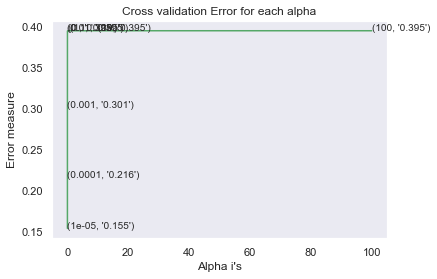

In [102]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []

for i in alpha:
    print("for C =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, Y_train)
    sig_clf_probs = sig_clf.predict_proba(X_val)
    cv_log_error_array.append(log_loss(Y_val, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log loss:", log_loss(Y_val, sig_clf_probs))
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], str(txt)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title("Cross validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [103]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, Y_train)

y_pred = sig_clf.predict_proba(X_train)
print("For best alpha :", alpha[best_alpha], "The train log-loss is", log_loss(Y_train, y_pred, labels=clf.classes_, eps=1e-15))
y_pred_cv = sig_clf.predict_proba(X_val)
print("For best alpha :", alpha[best_alpha], "The cross validation log-loss is", log_loss(Y_val, y_pred_cv, labels=clf.classes_, eps=1e-15))
y_pred_test = sig_clf.predict_proba(X_test)
print("for best alpha:", alpha[best_alpha], "The test log-loss is", log_loss(Y_test, y_pred_test, labels=clf.classes_, eps=1e-15))
y_train_pred = sig_clf.predict(X_train)
y_test_pred = sig_clf.predict(X_test)
y_val_pred = sig_clf.predict(X_val)
print("--"*20)
print("Train accuracy ->", accuracy_score(Y_train, y_train_pred))
print("Test accuracy ->", accuracy_score(Y_test, y_test_pred))
print("Validation accuracy ->", accuracy_score(Y_val, y_val_pred))

For best alpha : 1e-05 The train log-loss is 0.12625179238715578
For best alpha : 1e-05 The cross validation log-loss is 0.1545023843056403
for best alpha: 1e-05 The test log-loss is 0.15530398115351385
----------------------------------------
Train accuracy -> 0.9593804812309109
Test accuracy -> 0.9464514031856106
Validation accuracy -> 0.9453895329938238
